<h2 style="color: green;">ResNet</h2>

ResNet의 핵심인 Residual Block의 출현을 가능케 했다. 아래 그림에서 오른쪽이 Residual Block을 나타낸다. 기존의망과 차이가 있다면 입력값을 출력값에 더해줄 수 있도록 **shortcut**을 하나 만들어준 것 뿐이다. 기존의 VGGNet방식으로는 망을 무조건 깊게 한다고 능사가 아니라는 것을 확인한 것이다. 뭔 가 새로운 방법이 있어야 망을 깊게 만드는 효과를 볼 수 있다는 것을 ResNet의 저자들은 깨달았습니다. 신경망 층이 깊어질수록 그래디언트 소실현상이 생기기 때문이다. 이를 해결하기 위해 ResNet 모델에서는 Residual Block과 ResNet Bottleneck Design을 사용한다.

<h2 style="color: green;">ResNet 핵심 기술</h2>

### *ResNet - Residual Block*

ResNet의 핵심 아이디어는 **잔차 학습**입니다. 일반적인 딥러닝 네트워크에서는 층을 거칠수록 입력과 출력의 차원이 변화하게 됩니다. 하지만 ResNet에서는 층을 거칠 때마다 입력을 출력에 더해주는 **잔차 연결**을 도입합니다. 이러한 잔차 연결은 입력 데이터를 직접 전달하면서 그 차이를 학습하는 방식으로, 네트워크가 학습하기 어려운 깊은 구조에서도 그래디언트가 잘 흐를 수 있도록 도와줍니다.

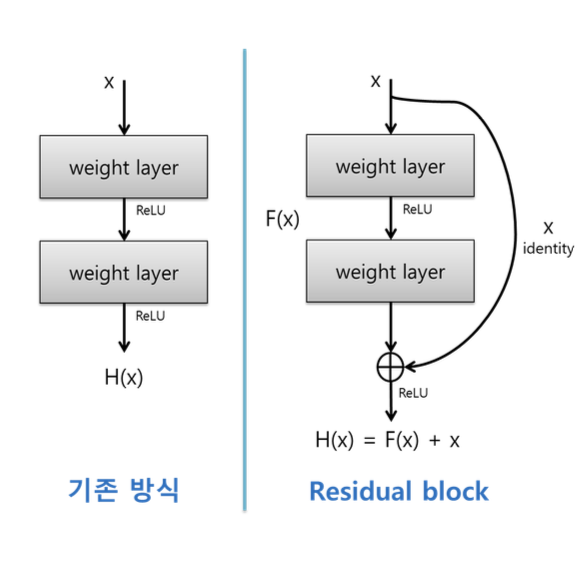

기존의 신경망은 입력값 x를 타겟값 y로 매핑하는 함수 H(x)를 얻는 것이 목적이었다. 그러나 ResNet은 F(x) + x를 최소화하는 것을 목적으로 한다. 잔차가 적어야 학습할 때 소실하는 데이터를 최소화하는 것이기 때문이다. x는 현시점에서 변할 수 없는 값이므로 F(x)를 0에 가깝게 만드는 것이 목적이 된다.

F(x)가 0이 되면 출력과 입력이 모두 x로 같아지게 된다.

F(x) = H(x) - x이므로 F(x)를 최소로 해준다는 것은 H(x) - x를 최소로 해주는 것과 동일한 의미를 지닌다.

여기서 H(x) - x를 잔차(residual)라고 한다. 즉, 잔차를 최소로 해주는 것이므로 ResNet이란 이름이 붙게 된다.

수식을 요약하자면 shortcut에 전달되는 값인 x는 실제로는 학습을 통해 예측되는 값입니다. 네트워크는 여러 번의 학습을 통해 최적의 가중치를 찾아내고, 이를 기반으로 입력과 출력 간의 차이를 예측하게 됩니다. 이렇게 예측된 차이를 shortcut으로 보내주어 그 차이를 학습하게 됩니다.

학습 과정에서는 역전파 알고리즘을 사용하여 가중치를 업데이트하면서 최적의 예측값과 실제 값 사이의 차이를 줄이는 방향으로 학습을 진행합니다. 이렇게 예측된 차이를 학습하면서 shortcut에 전달되는 값 x는 점차적으로 최적의 값을 찾아가며 잔차를 보정하는 역할을 수행합니다.

### *ResNet Bottleneck Design*

신경망이 깊어지면 학습하는데 소요되는 시간은 엄청 오래 걸릴 것 입니다. bottleneck design은 다음과 같이 신경 망의 복잡도를 감소하기 위해 사용됩니다. 3 x 3 x 256커널의 연산량보다 3x3x64커널로 연산을 해준 뒤에 1 x 1 x 256커널로 출력 채널을 늘려주는 것이 학습 무게도 줄이고 연산량을 줄일 수 있다. 이러한 기법으로 커널 앞뒤로 1 x 1커널을 추가해준다.

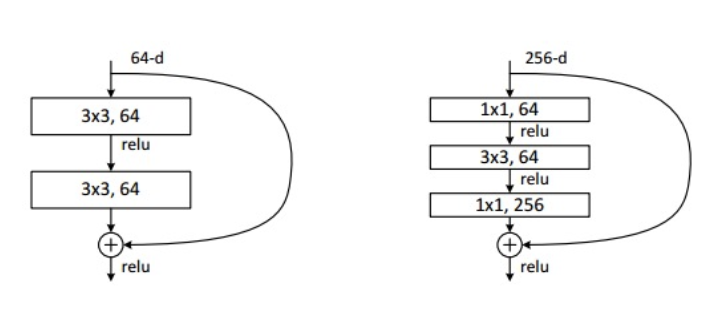

1x1 conv layers는 오른쪽 그림과 같이 신경망의 시작과 끝에 추가됩니다. 이 기법은 NIN과 GoogLeNet에서 제안되었습니다. 1x1 conv는 신경망의 성능을 감소시키지 않고 파라미터 수를 감소시킵니다. **잔차를 더할 때는 layer와 잔차의 공간적인 데이터크기와 차원 수가 다를 수 있다. 차원 수가 다를 때는 1x1 convolution을 이용해서 출력 차원 수를 맞춰주고 공간적인 크기 차이는 expasion 계수를 설정해서 output_channel사이즈를 사이즈에 맞게 한번 더 컨볼루션 해주는 방식으로 공간적인 크기를 맞춰준다.**

<h2 style="color: green;">ResNet 구조</h2>

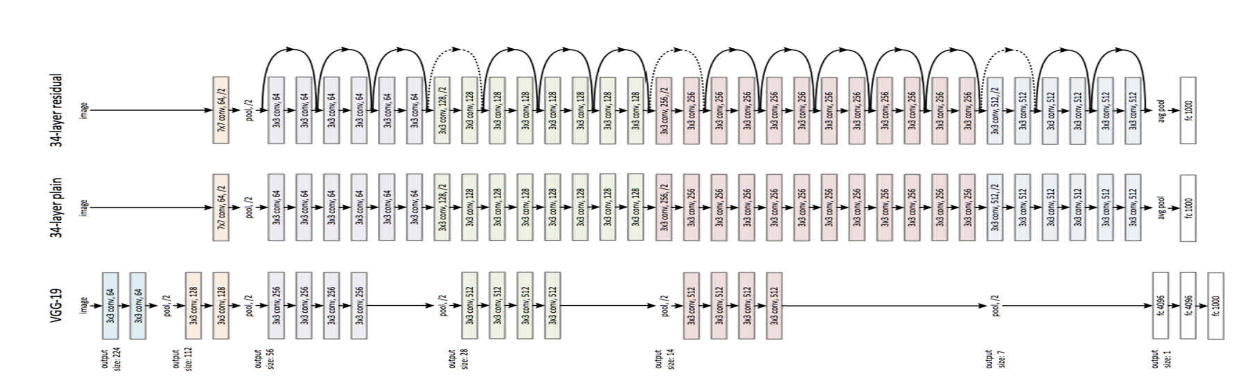

맨 아래 구조는 VGG-19 입니다.

중간 구조는 VGG-19가 더 깊어진 34-layer plain network입니다.

맨 위 구조는 34-layer residual network(ResNet)이며 plain network에 skip/short connection이 추가되었습니다.

skip/short connection을 추가하기 위해서는 더해지는 값x와 출력값의 차원이 같아야 합니다. ResNet에서는 **입력 차원이 출력 차원보다 작을 때 사용하는 skip/shortcut connection이 있습니다.**


In [1]:
import torch
import torch.nn as nn

In [45]:
class BasicBlock(nn.Module) :
    
    expansion = 1
    #확장 비율 변수 -> ResNet block 채널 수를 확장하는 경우에 필요에 의해서 숫자를 눌러주시면됩니다.
    
    def __init__(self, in_channels, out_channels, stride=1) :
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3, stride=stride, padding=1, bias=True)
        self.bn1 = nn.BatchNorm2d(out_channels)
        #딥러닝에서 모델 학습시 안정적인 학습을 위함 -> gradient vanishing 문제를 해결
        
        self.relu = nn.ReLU(inplace=True)
        """
        in_channels -> 입력 특징 맵의 채널 수
        
        out_channels -> 출력 특징 맵의 채널 수
        
        kernel_size -> 컨볼루션 커널의 크기
        
        stride -> 컨볼루션의 보폭 크기
        bias -> 편향값을 사용할지에 대한 여부 -> bias=True는  컨볼루션 합성곱 계산에 상수값을 더하여 적용
        
        padding -> 패딩 크기
        """
    
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=1, stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        
        self.shortcut = nn.Sequential()  #전차연결(residual connection) -> 초기화
        
        """
        stride가 1이 아닌 경우거나 in_channels이 self.expansion * out_channels와 다른 경우 이 조건이 성립
        """
        if stride != 1 or in_channels != self.expansion * out_channels :
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_channels, self.expansion * out_channels, kernel_size=1, stride=1, bias=False), 
                nn.BatchNorm2d(self.expansion * out_channels)
            )
            
        """
        in_channels와 self.expansion * out_channels 사이의 차이를 보상하기위해서 1 * 1 컨볼루션 진행
        -> 입력의 공간적인 차원 조정
        """
        
    def forward(self, x) :
        residual = x  #전차 구성하기 위한 변수
        
        ############################################# ->기본 블럭 내에서 컨볼루션과 정규화 거치는 일반적인 연산 구간
        out = self.conv1(x)
        out = self.bn1(out)
        out = self.relu(out)
        
        out = self.conv2(out)
        out = self.bn2(out)
        ############################################# -> 기본 블럭 내에서 컨볼루션과 정규화 거치는 일반적인 연산 구간
        
        out = self.shortcut(residual)  #x + residual -> 전차 수행 -> 입력과 출력 크기 일정하게 만들어주고 -> 정규화
        out = self.relu(out)
        
        return out

In [52]:
#ResNet 모델 정의
class ResNet(nn.Module) :
    def __init__(self, block, layers, num_classes=1000) :
        super(ResNet, self).__init__()
        #super(ResNet, self).__init__()는 ResNet 클래스의 부모 클래스인 nn.Module의 __init__() 메서드를 호출하여 초기화 작업을 수행하는 것입니다.
        
        self.in_channels = 64
        
        self.conv1 = nn.Conv2d(3, 64, kernel_size=7, stride=2, padding=3, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.relu = nn.ReLU(inplace=True)
        self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)
        
        self.layer1 = self._make_layer(block, 64, layers[0], stride=1)
        self.layer2 = self._make_layer(block, 128, layers[1], stride=2)
        self.layer3 = self._make_layer(block, 256, layers[2], stride=2)
        self.layer4 = self._make_layer(block, 512, layers[3], stride=2)
        
        self.avgpool = nn.AdaptiveAvgPool2d((1,1))
        self.fc = nn.Linear(512 * block.expansion, num_classes)
        
        
        
        
        
    # _붙어서 시작하는 함수는 내부 메서드라는 의미이다.
    #외부에서 호출되는 것이 아닌 내부에서 보조적으로 쓰이는 함수
    def _make_layer(self, block, out_channels, blocks, stride=1) :
        
        layers = []
        layers.append(block(self.in_channels, out_channels, stride))
        
        self.in_channels = out_channels * block.expansion
        
        for _ in range(1, blocks) :
            layers.append(block(self.in_channels, out_channels))

        return nn.Sequential(*layers)
        #모델을 구성하는 레이어 -> 순차적으로 레이어 추가
        
        
        
        
        
        
    def forward(self, x) :
        
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.maxpool(x)
        
        x = self.layer1(x)
        x = self.layer2(x)
        x = self.layer3(x)
        x = self.layer4(x)
        
        x = self.avgpool(x)
        x = torch.flatten(x, 1)
        x = self.fc(x)
        
        return x

In [51]:
def resnet34(num_classes = 1000) :
    return ResNet(BasicBlock, [3,4,6,3], num_classes)

model = resnet34(num_classes = 1000)
inputs = torch.randn(1,3,224,224)
outputs = model(inputs)
print(outputs.shape)

[BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
), BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (conv2): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (shortcut): Sequential()
), BasicBlock(
  (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_sta

<h2 style="color: green;">ResNet 한계</h2>

+ 계산 복잡성 증가: ResNet의 깊은 구조는 계산 복잡성을 증가시킵니다. 특히, 잔차 블록에 대한 잔차 연결은 추 가 계산을 필요로 하며, 더 많은 합성곱 레이어와 파라미터를 가지므로 훈련과 추론에 더 많은 시간과 컴퓨팅 자 원이 필요합니다.
<br></br>
+ 과적합 문제: 매우 깊은 ResNet은 과적합의 가능성이 높아집니다. 깊은 신경망은 복잡한 표현을 학습할 수 있 지만, 작은 데이터셋에서는 과적합의 위험이 커집니다. 따라서, 데이터 확장(Data Augmentation), 정규화 (Regularization) 등의 기술을 사용하여 과적합을 완화해야 합니다.
<br></br>
+ 하이퍼파라미터 설정의 어려움: ResNet은 여러 개의 하이퍼파라미터를 가지며, 이를 적절히 설정해야 합니다. 적절하지 않은 하이퍼파라미터 설정은 모델의 성능에 부정적인 영향을 미칠 수 있으며, 최적의 하이퍼파라미터 를찾는것은어려운과정일수있습니다.
<br></br>
+ 특정한 작업에 대한 최적화의 필요성: ResNet은 주로 컴퓨터 비전 작업에 대해 설계되었지만, 다른 도메인이 나 특정 작업에 대해서는 최적화되어 있지 않을 수 있습니다. 특정한 작업에 대해 최고의 성능을 얻기 위해서는 모델의 구조나 아키텍처를 조정하거나 추가적인 수정이 필요할 수 있습니다